In [1]:
import util_funs.globalsettings as gs
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\migue\Documents\PROYECTOS DATA SCIENCE\langchain\.venv\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\migue\Documents\PROYECTOS DATA SCIENCE\langchain\.venv\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\migue\Documents\PROYECTOS DATA SCIENCE\langchain\.venv\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv(gs.the_files.BF_TRAIN)

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
from langchain.agents import create_csv_agent
from langchain.llms import OpenAI

Could not import azure.core python package.


In [5]:
agent = create_csv_agent(OpenAI(temperature=0), 
                         gs.the_files.BF_TRAIN, 
                         verbose=True)

In [6]:
agent

AgentExecutor(memory=None, callbacks=None, callback_manager=None, verbose=True, agent=ZeroShotAgent(llm_chain=LLMChain(memory=None, callbacks=None, callback_manager=None, verbose=False, prompt=PromptTemplate(input_variables=['input', 'agent_scratchpad'], output_parser=None, partial_variables={'df': '|    |   User_ID | Product_ID   | Gender   | Age   |   Occupation | City_Category   | Stay_In_Current_City_Years   |   Marital_Status |   Product_Category_1 |   Product_Category_2 |   Product_Category_3 |   Purchase |\n|---:|----------:|:-------------|:---------|:------|-------------:|:----------------|:-----------------------------|-----------------:|---------------------:|---------------------:|---------------------:|-----------:|\n|  0 |   1000001 | P00069042    | F        | 0-17  |           10 | A               | 2                            |                0 |                    3 |                  nan |                  nan |       8370 |\n|  1 |   1000001 | P00248942    | F       

In [7]:
print(agent.agent.llm_chain.prompt.template)


You are working with a pandas dataframe in Python. The name of the dataframe is `df`.
You should use the tools below to answer the question posed of you:

python_repl_ast: A Python shell. Use this to execute python commands. Input should be a valid python command. When using this tool, sometimes output is abbreviated - make sure it does not look abbreviated before using it in your answer.

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [python_repl_ast]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question


This is the result of `print(df.head())`:
{df}

Begin!
Question: {input}
{agent_scratchpad}


In [8]:
print(agent.agent.llm_chain)

memory=None callbacks=None callback_manager=None verbose=False prompt=PromptTemplate(input_variables=['input', 'agent_scratchpad'], output_parser=None, partial_variables={'df': '|    |   User_ID | Product_ID   | Gender   | Age   |   Occupation | City_Category   | Stay_In_Current_City_Years   |   Marital_Status |   Product_Category_1 |   Product_Category_2 |   Product_Category_3 |   Purchase |\n|---:|----------:|:-------------|:---------|:------|-------------:|:----------------|:-----------------------------|-----------------:|---------------------:|---------------------:|---------------------:|-----------:|\n|  0 |   1000001 | P00069042    | F        | 0-17  |           10 | A               | 2                            |                0 |                    3 |                  nan |                  nan |       8370 |\n|  1 |   1000001 | P00248942    | F        | 0-17  |           10 | A               | 2                            |                0 |                    1 |       

In [10]:
agent.run("how many rows are there?")



> Entering new AgentExecutor chain...
Thought: I need to count the number of rows
Action: python_repl_ast
Action Input: len(df)
Observation: 550068
Thought: I now know the final answer
Final Answer: 550068

> Finished chain.


'550068'

In [11]:
agent.run("how many people are female?")



> Entering new AgentExecutor chain...
Thought: I need to count the number of people with gender F
Action: python_repl_ast
Action Input: df[df['Gender'] == 'F'].count()
Observation: User_ID                       135809
Product_ID                    135809
Gender                        135809
Age                           135809
Occupation                    135809
City_Category                 135809
Stay_In_Current_City_Years    135809
Marital_Status                135809
Product_Category_1            135809
Product_Category_2             91530
Product_Category_3             37594
Purchase                      135809
dtype: int64
Thought: I now know the final answer
Final Answer: 135809

> Finished chain.


'135809'

In [13]:
agent.run("how many people have stayed more than 3 years in the city?")



> Entering new AgentExecutor chain...
Thought: I need to filter the dataframe to get the people who have stayed more than 3 years in the city
Action: python_repl_ast
Action Input: df[df['Stay_In_Current_City_Years'] > '3'].shape[0]
Observation: 84726
Thought: I now know the final answer
Final Answer: 84726 people have stayed more than 3 years in the city.

> Finished chain.


'84726 people have stayed more than 3 years in the city.'

In [14]:
agent.run("how many people have stayed more than 3 years in the city and are female?")



> Entering new AgentExecutor chain...
Thought: I need to filter the dataframe to get the desired result
Action: python_repl_ast
Action Input: df[(df['Stay_In_Current_City_Years'] > '3') & (df['Gender'] == 'F')].shape[0]
Observation: 18596
Thought: I now know the final answer
Final Answer: 18596 people have stayed more than 3 years in the city and are female.

> Finished chain.


'18596 people have stayed more than 3 years in the city and are female.'

In [15]:
agent.run("Are there more males or females?")



> Entering new AgentExecutor chain...
Thought: I need to count the number of males and females
Action: python_repl_ast
Action Input: df['Gender'].value_counts()
Observation: Gender
M    414259
F    135809
Name: count, dtype: int64
Thought: I now know the final answer
Final Answer: There are more males than females.

> Finished chain.


'There are more males than females.'



> Entering new AgentExecutor chain...
Thought: I need to count the number of males and females
Action: python_repl_ast
Action Input: df['Gender'].value_counts()
Observation: M    414259
F    135809
Name: Gender, dtype: int64
Thought: I now have the data I need to plot the barchart
Action: python_repl_ast
Action Input: df['Gender'].value_counts().plot(kind='bar')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I now know the final answer
Final Answer: A barchart showing the number of males and the number of females.

> Finished chain.


'A barchart showing the number of males and the number of females.'

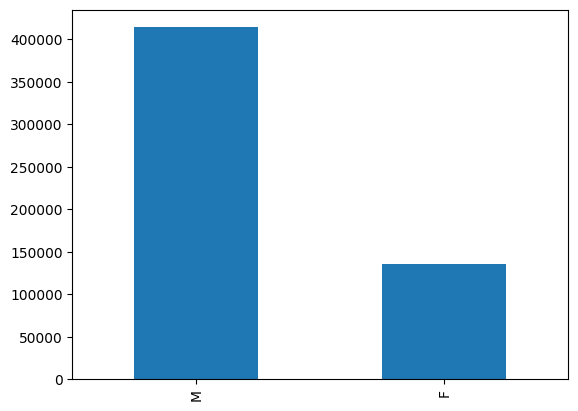

In [9]:
agent.run("plot a barchart showing the number of males and the number of females")

In [28]:
csv_files = ['../../../data/raw/black_friday_train.csv', '../../../data/raw/black_friday_test.csv']
agent = create_csv_agent(OpenAI(temperature=0), csv_files, verbose=True)


ValueError: Invalid file path or buffer object type: <class 'list'>

In [ ]:
agent.run("how many rows in the age column are different?")